# Project 1: clustering and analysis of the TCGA transcriptomic dataset

## Motivation

The motivation for this project comes from my curiosity about how modern dimensionality-reduction and clustering algorithms are used in biological data analysis, especially in multi-omics and transcriptomics research.  

I wanted to use this assignment as an opportunity to explore a dataset from The Cancer Genome Atlas (TCGA) and to get some hands-on experience with the kinds of workflows that are common in this area.  
 
More specifically, my goal is to compare the performance and interpretability of two popular algorithms: t-SNE and UMAP, for visualizing high-dimensional RNA-seq gene expression data.  

I often come across figures like this one in biology papers and presentations:  
<img src="https://kagi.com/proxy/blog%20Visualizing%20Single-Cell%20RNA-Seq%20Data%20with%20t-SNE-%20Researcher%20Interview%20with%20Dmitry%20Kobak%20and%20Philipp%20Berens.png?c=7wFdHnjdYvjJyaubyYjYK_5knm5a2JLsjaQR61UGXexz8F2uYT094Juv1WUp_PzMmwnpKN5ZFReaild0gjJO-qYdkmh70tqYpbby4dCKNm0OZyBuV34Ol2NhNvchg78pimjQd1EIdaze5CB-TyT4e00TG7I-LwM2QqZPzk_7MlcE35_PlqGs7iocy1jZQfQbxGve0shx9I0WvR2S9Rbf--JtjdMmS4Q-ilJiO-lHIT0drIZI87ocPjXL00i_cmmvHcP93vir7v6ty5IbecFFSdhF7KHW6Lv2EKhtgqJpl3lWWmSnCtP8LMMEsfyZNtL3W5SEPRNpczY0nGKm3vPl2OxYTOyYfc-m3J6mgnzHUpojAIVzxVJWs8E-36cUH2Lc" width="50%"/>  

For a long time, I’ve wondered what these images actually represent and how they’re created. So I want to try to reproduce a similar analysis myself.


## Dataset 
### TCGA TPM Expression Summary: Processed Transcriptomic Data from 10 Cancer Types

<img src="./images/tcga_portal.png" width="70%"/>

[Data link](https://figshare.com/articles/dataset/TCGA_TPM_Expression_Summary_Processed_Transcriptomic_Data_from_10_Cancer_Types/28324271?file=52061405)

*This dataset contains TPM (Transcripts Per Million) expression values derived from The Cancer Genome Atlas (TCGA) for ten cancer types: BRCA (breast cancer), COAD (colon adenocarcinoma), DLBC (diffuse large B-cell lymphoma), KIRC (kidney renal clear cell carcinoma), KIRP (kidney renal papillary cell carcinoma), LUAD (lung adenocarcinoma), LUSC (lung squamous cell carcinoma), MESO (mesothelioma), READ (rectum adenocarcinoma), and SKCM (skin cutaneous melanoma). The data have been processed and curated for downstream bioinformatics analyses.*

Subset selected for the project - **SKCM (skin cutaneous melanoma)**.

<img src="https://kagi.com/proxy/fnins-15-591122-g001.jpg?c=GtkVFZg7eGMsIIyzL1SU9bJE-A6ooUHcdFPQcq9yNBq4tVXvY7u9N8_4VJK-6RBk4nqcmmYAh6DqVjHBHn36g-ny0iyhTmSpyqzrvTvbM2JbjAd5Ma-ZKMUkaAgkXEkB-49vZm5XMME_CUCilE35o29T-u29JjrSprwBYWIsflA%3D" width="60%"/>

In [1]:
import pandas as pd
import numpy as np

xl = pd.ExcelFile("./TCGA_all_workbook.xlsx")
print("Available sheets:", xl.sheet_names)

df = pd.read_excel("./TCGA_all_workbook.xlsx", sheet_name="skcm_tpm_summary_noMSTRG")
df.set_index('transcript', inplace=True)
df.head(5)

Available sheets: ['brca_tpm_summary_noMSTRG', 'coad_tpm_summary_noMSTRG', 'dlbc_tpm_summary_noMSTRG', 'kirc_tpm_summary_noMSTRG', 'kirp_tpm_summary_noMSTRG', 'luad_tpm_summary_noMSTRG', 'lusc_tpm_summary_noMSTRG', 'meso_tpm_summary_noMSTRG', 'read_tpm_summary_noMSTRG', 'skcm_tpm_summary_noMSTRG']


,00af5967-4342-4df1-a084-af632746cd81,041ad9ae-3b82-4bd9-a72d-08109ff4f26f,0dc17a98-7227-4253-9d8b-62ac2452b9db,13333696-a38a-4abb-b1c1-6727da767120,18c5fb54-b39d-436a-b131-4e0b8a6f1082,1a54d749-25dc-4375-9fec-8834190b1459,2aac8d2f-8053-45c8-b8c4-e98c2d18c4ab,334f18a4-8a32-431d-9743-c2f71e50f6ab,34e28868-8b0e-48a9-b13c-431e3f2cc920,38d5b36e-53ae-49bd-b11e-65045454e58b,...,d8b26958-2e26-4cb6-8e88-070791852f68,e161833e-591d-4ac0-8a26-c9872a4c18bf,e4ed4856-e545-4e4c-8fc8-7bc3a8b077d1,e84cac3f-08a5-45ae-87ea-7ad1e94f6266,ebd730f2-876a-429a-8249-5fd66376a5ad,eebe5be1-65b1-4c44-8d68-9b53ac8b8fe0,f0ece3c8-d61c-43ed-a1d2-88e2cac9b775,f280f735-8de0-4dae-addd-fe5cf51c5261,f64e2fa9-c22f-48c2-a46e-c1ba2860bf94,f87e9ccc-127d-4393-b079-26ae2f1bf229
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,109.142784,143.327698,108.087433,210.481949,115.139893,102.783699,182.699203,279.057373,523.845764,199.776184,...,81.260590,185.888397,118.049805,95.282082,79.888680,133.927017,77.634590,73.660950,272.186646,98.265556
ENST00000000412.8,38.453705,106.490112,95.974915,71.280334,63.117496,136.581070,121.815018,54.429729,50.507458,73.843010,...,60.850094,97.279594,76.699272,93.853340,101.867828,118.680885,12.050323,32.739426,34.376110,168.222321
ENST00000000442.11,2.671953,17.091034,1.048149,2.307209,3.286471,17.450935,0.905973,0.419339,10.896781,3.743201,...,3.454052,0.169394,5.162215,5.220087,9.786970,24.355867,2.737067,5.873676,3.758276,4.703457
ENST00000001008.6,60.420807,94.164810,285.367615,59.472527,43.430149,107.279091,80.973785,30.780910,53.149246,111.843689,...,66.033600,124.717789,67.866806,119.605141,59.671135,68.552094,17.213364,18.718107,81.856415,82.245880
ENST00000001146.6,7.704793,6.137218,3.913890,0.087082,3.127283,2.317906,2.321248,0.000000,1.009880,0.987115,...,3.475022,1.982756,1.472663,13.420302,0.501430,3.579950,1.131597,7.698002,1.213273,0.231831


The dataset contains **RNA-seq gene expression data**, provided as a matrix of normalized **Transcripts Per Million (TPM)** values.

Each row represents a single transcript (RNA molecule) measured across samples, each column corresponds to an individual sample.  
There are 50 samples and 231781 transcripts.

### Preprocessing

1. Filter out genes that are rarely expressed by keeping only those that have non-zero expression in at least 10% of samples.
2. Log-transform the data (using log1p) to reduce the effect of extreme values and make the distribution more normal.
3. Select top 1000 most variable genes to reduce the dataset size to the most interesting transcripts
4. Standardize the data using z-score normalization (subtracting mean and dividing by standard deviation) for each gene across all samples, with any resulting NaN values set to zero.

In [2]:
# Drop genes with too many zeros (keep genes where at least 10% of samples have non-zero expression)
min_nonzero_frac = 0.1
nz_frac = (df != 0).sum(axis=1) / df.shape[1]
df = df.loc[nz_frac >= min_nonzero_frac]

# Log transform
df = np.log1p(df)

# select top 500 most variable genes
variability = df.var(axis=1) 
top_n_genes = 1000
top_genes = variability.sort_values(ascending=False).head(top_n_genes).index.tolist()

df_top_genes = df.loc[top_genes]
print("Selected genes:", df_top_genes.shape[0])

# Z-score normalized data across samples
df_top_genes = df_top_genes.sub(df_top_genes.mean(axis=1), axis=0).div(df_top_genes.std(axis=1).replace(0, np.nan), axis=0)
df_top_genes = df_top_genes.fillna(0.0)

df_top_genes.head()

Selected genes: 1000


,00af5967-4342-4df1-a084-af632746cd81,041ad9ae-3b82-4bd9-a72d-08109ff4f26f,0dc17a98-7227-4253-9d8b-62ac2452b9db,13333696-a38a-4abb-b1c1-6727da767120,18c5fb54-b39d-436a-b131-4e0b8a6f1082,1a54d749-25dc-4375-9fec-8834190b1459,2aac8d2f-8053-45c8-b8c4-e98c2d18c4ab,334f18a4-8a32-431d-9743-c2f71e50f6ab,34e28868-8b0e-48a9-b13c-431e3f2cc920,38d5b36e-53ae-49bd-b11e-65045454e58b,...,d8b26958-2e26-4cb6-8e88-070791852f68,e161833e-591d-4ac0-8a26-c9872a4c18bf,e4ed4856-e545-4e4c-8fc8-7bc3a8b077d1,e84cac3f-08a5-45ae-87ea-7ad1e94f6266,ebd730f2-876a-429a-8249-5fd66376a5ad,eebe5be1-65b1-4c44-8d68-9b53ac8b8fe0,f0ece3c8-d61c-43ed-a1d2-88e2cac9b775,f280f735-8de0-4dae-addd-fe5cf51c5261,f64e2fa9-c22f-48c2-a46e-c1ba2860bf94,f87e9ccc-127d-4393-b079-26ae2f1bf229
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000678703.1,1.529217,-0.736563,-0.736563,-0.736563,1.352751,-0.736563,-0.736563,-0.736563,-0.736563,-0.736563,...,-0.736563,1.403287,-0.736563,1.398692,1.268634,1.524406,-0.736563,-0.736563,-0.736563,-0.736563
ENST00000637915.1,0.798889,-0.872461,-0.872461,1.208246,-0.872461,-0.872461,1.052800,-0.872461,-0.872461,-0.872461,...,1.016138,1.339910,0.949895,-0.872461,0.953412,1.032843,-0.872461,-0.872461,1.179215,-0.872461
ENST00000677236.1,0.793880,0.712972,-1.479279,-1.479279,0.293835,-1.479279,0.648938,-1.479279,-1.479279,0.771855,...,0.478535,0.607763,0.709173,0.622220,0.801766,-1.479279,-1.479279,-1.479279,0.524811,0.802218
ENST00000449260.6,-1.749299,0.646727,0.744881,0.945100,-0.606911,0.773739,-1.441110,-0.768308,-0.209785,0.662196,...,-1.780137,-0.968253,0.151507,-2.076117,0.887901,0.811145,0.616149,-1.445077,0.860558,-2.078931
ENST00000679038.1,1.130118,-1.051776,1.062226,0.483620,-1.051776,-0.135932,-1.051776,0.787754,1.378125,-1.051776,...,-1.051776,-1.051776,0.232912,1.090367,-1.051776,0.195106,1.165102,-1.051776,0.844619,-1.051776


### PCA 

I'm using PCA to reduce the dimensionality of the data. I'll use the first 25 principal components, which explain 73% of the variance in the data..

In [3]:
from sklearn.decomposition import PCA

n_components = 25
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(df_top_genes.T)
print("PCA shape:", X_pca.shape)

explained = pca.explained_variance_ratio_
print("Explained variance (first 10 PCs):", explained[:10].round(3))

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained)
print(f"Total variance explained by {n_components} components: {cumulative_variance_ratio[-1]:.3%}")

PCA shape: (50, 25)
Explained variance (first 10 PCs): [0.146 0.08  0.07  0.048 0.035 0.03  0.028 0.027 0.024 0.022]
Total variance explained by 25 components: 75.782%


### Clustering 

Now let's cluster the result of the PCA. I'll try 2 to 7 clusters and measure the silhouette score. 

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []
labels_by_k = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    y = km.fit_predict(X_pca)
    sil = silhouette_score(X_pca, y)
    sizes = pd.Series(y).value_counts().sort_index().to_dict()
    results.append({"k": k, "silhouette": sil, "sizes": sizes})
    labels_by_k[k] = y

res_df = pd.DataFrame(results)
display(res_df)

# Choose k (e.g., max silhouette with reasonable balance)
best_k = res_df.sort_values(["silhouette"], ascending=False).iloc[0]["k"]
print("Chosen k =", int(best_k))
y_clust = labels_by_k[int(best_k)]

,k,silhouette,sizes
0,2,0.106810,"{0: 20, 1: 30}"
1,3,0.077226,"{0: 16, 1: 23, 2: 11}"
2,4,0.081695,"{0: 16, 1: 18, 2: 10, 3: 6}"
3,5,0.056340,"{0: 15, 1: 6, 2: 3, 3: 8, 4: 18}"
4,6,0.050354,"{0: 8, 1: 6, 2: 2, 3: 8, 4: 16, 5: 10}"


Chosen k = 2


### Univariate Summaries (means/medians for genes; counts/props for categorical)

In [5]:
# Create a Series mapping sample IDs to their cluster assignments
clusters = pd.Series(y_clust, index=df_top_genes.columns, name="cluster")

# Get summary statistics for the top 20 most discriminatory genes
summary_genes = top_genes[:20]  # Take first 20 genes from the top genes list

# For each gene, calculate mean/median/std grouped by cluster
summaries = []
for g in summary_genes:
    # Get gene expression values and group by cluster
    # Calculate mean, median, and std dev for each cluster
    s = df_top_genes.loc[g].groupby(clusters).agg(["mean", "median", "std"])
    s["gene"] = g  # Add gene ID column
    s["cluster"] = s.index  # Add cluster number column
    summaries.append(s.reset_index(drop=True))

# Combine all gene summaries into one dataframe
summary_df = pd.concat(summaries, ignore_index=True)
display(summary_df.head())  # Show first 5 rows

,mean,median,std,gene,cluster
0,0.196654,-0.736563,1.065662,ENST00000678703.1,0
1,-0.131103,-0.736563,0.949298,ENST00000678703.1,1
2,-0.021946,-0.872461,0.969942,ENST00000637915.1,0
3,0.014631,-0.872461,1.035724,ENST00000637915.1,1
4,-0.093467,0.504303,1.071974,ENST00000677236.1,0


### Statistical Tests + Multiple Testing Control (FDR)

In [6]:

from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multitest import multipletests

# Example: ANOVA across clusters for selected genes
pvals = []
for g in top_genes[:1000]:  # cap for speed
    groups = [df_top_genes.loc[g, clusters==c].values for c in np.unique(clusters)]
    if len(groups) >= 2:
        try:
            stat, p = f_oneway(*groups)
        except Exception:
            stat, p = kruskal(*groups)  # fallback non-parametric
        pvals.append((g, p))

pval_df = pd.DataFrame(pvals, columns=["gene", "pval"]).dropna()
pval_df["qval"] = multipletests(pval_df["pval"], method="fdr_bh")[1]
display(pval_df.sort_values("qval").head(5))

,gene,pval,qval
127,ENST00000390290.3,2.929933e-15,1.557424e-12
588,ENST00000631386.2,3.114848e-15,1.557424e-12
159,ENST00000390598.2,8.470713e-15,2.823571e-12
114,ENST00000490686.1,1.381785e-14,3.454462e-12
165,ENST00000493819.1,1.874843e-14,3.749687e-12


### Effect Size Table 

To complement the significance tests, compute and report effect sizes (e.g., Cohen’s *d*) between the two largest clusters.

In [7]:
# Cohen's d (pairwise, example for top 10 genes between clusters i and j)
def cohens_d(a, b):
    na, nb = len(a), len(b)
    s_p = np.sqrt(((na-1)*a.var(ddof=1) + (nb-1)*b.var(ddof=1)) / (na+nb-2))
    return (a.mean() - b.mean()) / s_p

# compute per-gene effect size for the two largest clusters (as a demo)
largest_two = pd.Series(y_clust).value_counts().index[:2]
i, j = largest_two[0], largest_two[1]
eff = []
for g in top_genes[:200]:
    a = df_top_genes.loc[g, clusters==i].values
    b = df_top_genes.loc[g, clusters==j].values
    if len(a)>2 and len(b)>2:
        eff.append((g, cohens_d(a,b)))
eff_df = pd.DataFrame(eff, columns=["gene","cohens_d"]).sort_values("cohens_d", key=abs, ascending=False)
eff_df.head(10)

,gene,cohens_d
127,ENST00000390290.3,-3.290758
159,ENST00000390598.2,-3.192507
114,ENST00000490686.1,-3.147677
165,ENST00000493819.1,-3.119864
112,ENST00000390607.2,-2.966812
80,ENST00000390605.2,-2.888884
199,ENST00000390594.3,-2.847846
119,ENST00000453166.2,-2.839211
57,ENST00000390609.3,-2.827963
55,ENST00000482769.1,-2.762830


### Multivariate Explanation (Logistic Regression / Random Forest / Permutation Importance)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


# Prepare design matrix: use top genes or PCs (here: top genes)
X = df_top_genes.T.values
y = y_clust

# Logistic Regression (multinomial)
logreg = LogisticRegression(max_iter=2000, multi_class="multinomial", penalty="l2")
logreg.fit(X, y)
coef_df = pd.DataFrame(logreg.coef_, columns=df_top_genes.index)

# Random Forest + permutation importance
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X, y)
perm = permutation_importance(rf, X, y, n_repeats=10, random_state=42, n_jobs=-1)
imp_df = pd.DataFrame({
    "gene": df_top_genes.index,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)
display(imp_df.tail(5))


/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,gene,importance_mean,importance_std
338,ENST00000396076.5,0.0,0.0
339,ENST00000390277.3,0.0,0.0
340,ENST00000610365.4,0.0,0.0
341,ENST00000370055.5,0.0,0.0
999,ENST00000397752.8,0.0,0.0


Permutation-importance bar plot

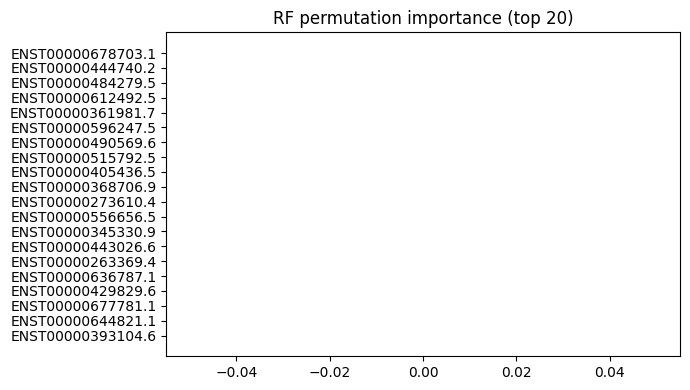

In [10]:
import matplotlib.pyplot as plt

imp_top = imp_df.head(20)
plt.figure(figsize=(7,4))
plt.barh(imp_top["gene"][::-1], imp_top["importance_mean"][::-1])
plt.title("RF permutation importance (top 20)"); plt.tight_layout()

Logistic regression odds-ratio forest plot

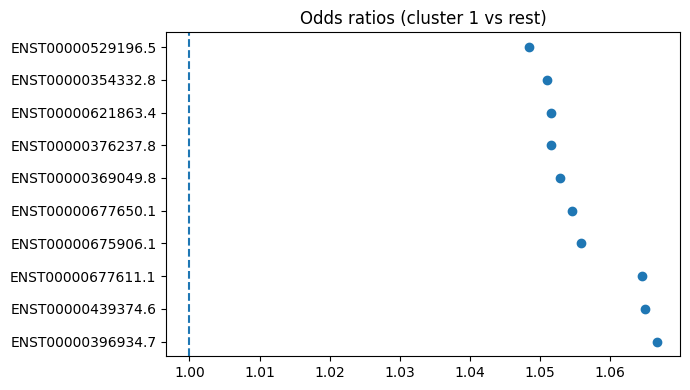

In [11]:
# crude OR proxy: one-vs-rest logreg for cluster c
c = pd.Series(y_clust).value_counts().idxmax()
from sklearn.linear_model import LogisticRegression
y_bin = (pd.Series(y_clust)==c).astype(int).values
lr = LogisticRegression(max_iter=3000, penalty="l2").fit(df_top_genes.T, y_bin)
or_series = np.exp(pd.Series(lr.coef_[0], index=df_top_genes.index)).sort_values(ascending=False)[:10]
plt.figure(figsize=(7,4)); plt.errorbar(or_series.values, range(10), xerr=None, fmt='o')
plt.yticks(range(10), or_series.index); plt.axvline(1, ls='--'); plt.title(f"Odds ratios (cluster {c} vs rest)")
plt.tight_layout()

### Visualizations: Heatmap, t-SNE, UMAP

/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


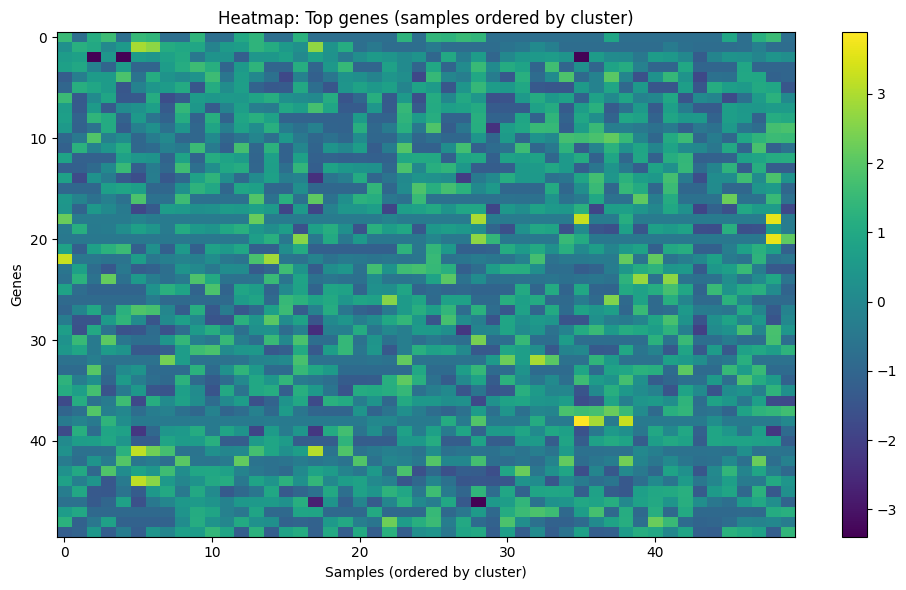

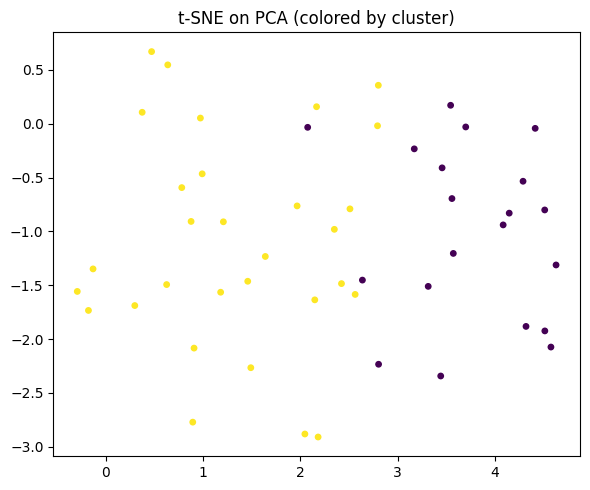

/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


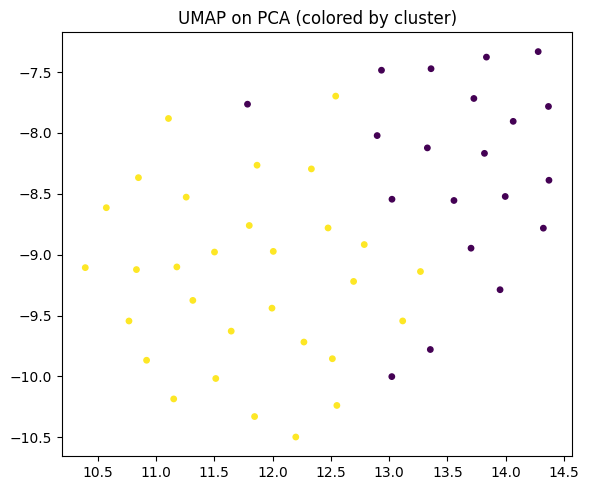

In [12]:
import umap
from sklearn.manifold import TSNE

# Heatmap (simple): show top 50 genes ordered by cluster
top50 = imp_df["gene"].head(50).tolist() if "imp_df" in globals() else top_genes[:50]
mat = df_top_genes.loc[top50]

# Order samples by cluster
order = np.argsort(y)
mat_ord = mat.iloc[:, order]

plt.figure(figsize=(10, 6))
plt.imshow(mat_ord, aspect='auto')
plt.colorbar()
plt.title("Heatmap: Top genes (samples ordered by cluster)")
plt.xlabel("Samples (ordered by cluster)")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

# t-SNE
tsne_emb = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto").fit_transform(X_pca)
plt.figure(figsize=(6,5))
plt.scatter(tsne_emb[:,0], tsne_emb[:,1], c=y, s=15)
plt.title("t-SNE on PCA (colored by cluster)")
plt.tight_layout()
plt.show()

# UMAP
if umap is not None:
    umap_emb = umap.UMAP(n_components=2, random_state=42).fit_transform(X_pca)
    plt.figure(figsize=(6,5))
    plt.scatter(umap_emb[:,0], umap_emb[:,1], c=y, s=15)
    plt.title("UMAP on PCA (colored by cluster)")
    plt.tight_layout()
    plt.show()
else:
    print("UMAP not installed — skipping. pip install umap-learn to enable.")

### Heatmap of Cluster-Mean Expression
To visualize group-level differences, the mean expression of the top 50 most significant genes was computed per cluster.

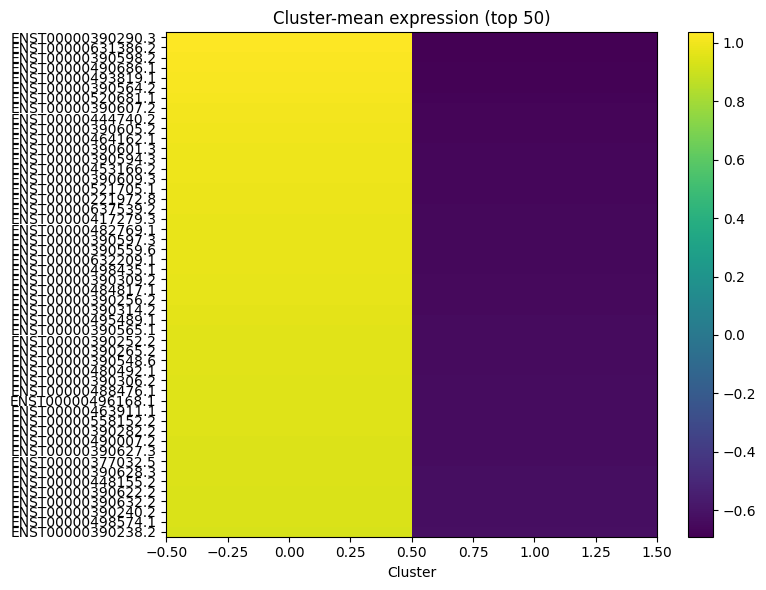

In [13]:
top50 = pval_df.sort_values("qval").head(50)["gene"]
mean_by_cluster = df_top_genes.loc[top50].T.groupby(y_clust).mean().T
plt.figure(figsize=(8,6))
plt.imshow(mean_by_cluster, aspect='auto')
plt.colorbar(); plt.title("Cluster-mean expression (top 50)")
plt.yticks(range(len(mean_by_cluster.index)), mean_by_cluster.index)
plt.xlabel("Cluster"); plt.tight_layout()

### Links and resources

1. [StatQuest: A gentle introduction to RNA-seq](https://youtu.be/tlf6wYJrwKY?si=JwzP7ZBGxjpbKWUK&t=20)
2. [Latent Space Visualisation: PCA, t-SNE, UMAP | Deep Learning Animated](https://www.youtube.com/watch?v=o_cAOa5fMhE)
3. [Introduction to single-cell RNA-seq data](https://www.youtube.com/playlist?list=PL4rcQcNPLZxWQQH7LlRBMkAo5NWuHX1e3)